In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode  # To remove accents from text
import re # For regular expression operations

# adjusting the width of output cell (more columns are displayed before wrapping occurs, reducing the need for horizontal scrolling)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 180)

In [2]:
# reading CSV files into pandas DataFrames
olist_sellers = pd.read_csv("../dataset_original/olist_sellers_dataset.csv")
olist_products = pd.read_csv("../dataset_original/olist_products_dataset.csv")
olist_order_reviews = pd.read_csv("../dataset_original/olist_order_reviews_dataset.csv")
olist_orders = pd.read_csv("../dataset_original/olist_orders_dataset.csv")
olist_order_payments = pd.read_csv("../dataset_original/olist_order_payments_dataset.csv")
olist_order_items = pd.read_csv("../dataset_original/olist_order_items_dataset.csv")
olist_geolocation = pd.read_csv("../dataset_original/olist_geolocation_dataset.csv")
olist_customers = pd.read_csv("../dataset_original/olist_customers_dataset.csv")
product_category_name_translation = pd.read_csv("../dataset_original/product_category_name_translation.csv")

## 1. Exploring the datasets

### Data Schema

<img src="../data_schema.png" alt="Data Schema" width="900">

In [3]:
# Create a dictionary to store all datasets with their names as keys
datasets = {
    "olist_sellers": olist_sellers,
    "olist_products": olist_products,
    "olist_order_reviews": olist_order_reviews,
    "olist_orders": olist_orders,
    "olist_order_payments": olist_order_payments,
    "olist_order_items": olist_order_items,
    "olist_geolocation": olist_geolocation,
    "olist_customers": olist_customers,
    "product_category_name_translation": product_category_name_translation,
}

# Define a function to display basic information for each dataset
def display_dataset_info(datasets):
    for name, df in datasets.items():
        print(f"\n{'='*40}")
        print(f"Summary for Dataset: {name}")
        print(f"{'='*40}\n")
        
        # Display .info() - the structure and data types of the DataFrame
        print("Info:")
        print(df.info())
        
        # Display .describe() - statistical summary (including non-numeric data)
        print("\nDescribe:")
        print(df.describe(include='all'))
        
        # Display .head() - first 5 rows
        print("\nHead:")
        print(df.head())
        
        # Display number of missing values
        print("\nMissing Values:")
        print(df.isnull().sum())
        
        # Display shape of the dataset (rows, columns)
        print(f"\nShape: {df.shape}")

# Call the function to display information
display_dataset_info(datasets)


Summary for Dataset: olist_sellers

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Describe:
                               seller_id  seller_zip_code_prefix seller_city seller_state
count                               3095             3095.000000        3095         3095
unique                              3095                     NaN         611           23
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo           SP
freq                                   1                     NaN         694         1849
mean                  

## 2. Data Cleaning

### 2.1. Missing Values

There are missing values in the `olist_products`, `olist_order_reviews`, and `olist_orders` datasets. We will drop missing values that account for less than 5% of the total value count in each dataset.

However, there are still missing values in `olist_order_reviews`:
- `review_comment_title`: 87,656
- `review_comment_message`: 58,247

These values exceed our 5% threshold. We will not make any changes to these fields as they are not required for our future analysis.

In [4]:
# Define a function to clean datasets in bulk
def clean_missing_values(datasets):
    # Dictionary to store cleaned datasets
    cleaned_datasets = {}
    for name, df in datasets.items():
        # Calculate percentage of missing values per column
        missing_percentages = df.isnull().mean() * 100
        
        # Identify columns with less than or equal to 5% missing values
        columns_to_drop = missing_percentages[missing_percentages <= 5].index
        
        # Drop columns with too many missing values
        cleaned_df = df.dropna(subset=columns_to_drop)
        
        # Print summary of cleaning process
        print(f"\n{name}:")
        print(f"Original Shape: {df.shape}")
        print(f"Cleaned Shape: {cleaned_df.shape}")
        print(f"Rows Dropped: {len(df) - len(cleaned_df)}")
        
        # Show columns with missing values
        print("\nColumns with Missing Values:")
        print(missing_percentages[missing_percentages > 0])
        
        # Save the cleaned DataFrame in the cleaned_datasets dictionary
        cleaned_datasets[name] = cleaned_df

    # Return the dictionary of cleaned datasets
    return cleaned_datasets

# Call the cleaning function and store the results in a new dictionary
cleaned_datasets = clean_missing_values(datasets)


olist_sellers:
Original Shape: (3095, 4)
Cleaned Shape: (3095, 4)
Rows Dropped: 0

Columns with Missing Values:
Series([], dtype: float64)

olist_products:
Original Shape: (32951, 9)
Cleaned Shape: (32340, 9)
Rows Dropped: 611

Columns with Missing Values:
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

olist_order_reviews:
Original Shape: (99224, 7)
Cleaned Shape: (99224, 7)
Rows Dropped: 0

Columns with Missing Values:
review_comment_title      88.341530
review_comment_message    58.702532
dtype: float64

olist_orders:
Original Shape: (99441, 8)
Cleaned Shape: (96461, 8)
Rows Dropped: 2980

Columns with Missing Values:
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_

In [5]:
# Verify that no missing values remain in the cleaned datasets
for name, df in cleaned_datasets.items():
    print(f"{name} - Missing Values Per Column:\n{df.isnull().sum()}\n")

olist_sellers - Missing Values Per Column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

olist_products - Missing Values Per Column:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

olist_order_reviews - Missing Values Per Column:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

olist_orders - Missing Values Per Column:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_app

### 2.2. Duplicates

There are duplicates in `olist_geolocation` that should be removed:
- Total number of duplicates: 261831
- Percentage of duplicates: 26.18%

In [6]:
# Function to check for duplicates in all datasets
def check_duplicates(datasets):
    # Dictionary to store duplicate details for each dataset
    duplicate_info = {}
    for name, df in datasets.items():
        # Count the total number of duplicate rows
        total_duplicates = df.duplicated().sum()
        
        # Extract rows that are duplicates
        duplicate_rows = df[df.duplicated(keep='first')]
        
        # Store information about duplicates
        duplicate_info[name] = {
            'total_duplicates': total_duplicates,
            'duplicate_rows': duplicate_rows,
            'percentage': (total_duplicates / len(df)) * 100
        }
        
        # Print results
        print(f"\n{'='*50}")
        print(f"Duplicates in {name}:")
        print(f"Total number of duplicates: {total_duplicates}")
        print(f"Percentage of duplicates: {(total_duplicates / len(df)) * 100:.2f}%")
        
        # If duplicates exist, show them
        if total_duplicates > 0:
            print("\nDuplicate Rows:")
            print(duplicate_rows)
            
            # Show which columns have duplicate values
            print("\nDuplicate counts by column:")
            for column in df.columns:
                dup_count = df[df.duplicated(subset=[column], keep='first')][column].count()
                if dup_count > 0:
                    print(f"{column}: {dup_count} duplicates")
    
    return duplicate_info

# Check duplicates in cleaned datasets
print("\nChecking cleaned datasets:")
cleaned_duplicates = check_duplicates(cleaned_datasets)


Checking cleaned datasets:

Duplicates in olist_sellers:
Total number of duplicates: 0
Percentage of duplicates: 0.00%

Duplicates in olist_products:
Total number of duplicates: 0
Percentage of duplicates: 0.00%

Duplicates in olist_order_reviews:
Total number of duplicates: 0
Percentage of duplicates: 0.00%

Duplicates in olist_orders:
Total number of duplicates: 0
Percentage of duplicates: 0.00%

Duplicates in olist_order_payments:
Total number of duplicates: 0
Percentage of duplicates: 0.00%

Duplicates in olist_order_items:
Total number of duplicates: 0
Percentage of duplicates: 0.00%

Duplicates in olist_geolocation:
Total number of duplicates: 261831
Percentage of duplicates: 26.18%

Duplicate Rows:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng geolocation_city geolocation_state
15                              1046       -23.546081       -46.644820        sao paulo                SP
44                              1046       -23.546081       -46.644820  

In [7]:
# Function for removing duplicates in all datasets
def remove_duplicates(datasets):
    # Dictionary to store deduplicated DataFrames
    deduplicated_datasets = {}
    for name, df in datasets.items():
        # Remove duplicates and keep first occurrence
        deduplicated_df = df.drop_duplicates(keep='first')
        
        # Print summary of the deduplication process
        rows_removed = len(df) - len(deduplicated_df)
        print(f"\n{name}:")
        print(f"Original rows: {len(df)}")
        print(f"After deduplication: {len(deduplicated_df)}")
        print(f"Rows removed: {rows_removed}")
        
        # Store deduplicated DataFrame
        deduplicated_datasets[name] = deduplicated_df
    
    return deduplicated_datasets

# Remove duplicates from cleaned datasets and store the results
deduplicated_datasets = remove_duplicates(cleaned_datasets)


olist_sellers:
Original rows: 3095
After deduplication: 3095
Rows removed: 0

olist_products:
Original rows: 32340
After deduplication: 32340
Rows removed: 0

olist_order_reviews:
Original rows: 99224
After deduplication: 99224
Rows removed: 0

olist_orders:
Original rows: 96461
After deduplication: 96461
Rows removed: 0

olist_order_payments:
Original rows: 103886
After deduplication: 103886
Rows removed: 0

olist_order_items:
Original rows: 112650
After deduplication: 112650
Rows removed: 0

olist_geolocation:
Original rows: 1000163
After deduplication: 738332
Rows removed: 261831

olist_customers:
Original rows: 99441
After deduplication: 99441
Rows removed: 0

product_category_name_translation:
Original rows: 71
After deduplication: 71
Rows removed: 0


### 2.3 Correction of Datatypes

Based on the data exploration we made at the beginning, there are several datatypes issues that should be corrected:

`olist_products`:
- `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, and `product_weight_g` are `float64` but represent `integer` values

`olist_order_reviews`:
- `review_creation_date` and `review_answer_timestamp` are `object` but represent `datetime` values

`olist_orders`:
- `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date` are `object` but represent `datetime` values

`olist_order_items`:
- `shipping_limit_date` is an `object` but represents `datetime` value

In [8]:
# Iterate over the deduplicated datasets and apply transformations where needed
for name, df in deduplicated_datasets.items():
    print(f"Processing dataset: {name}")
    
    # Apply transformations based on the dataset name
    if name == "olist_products":
        # Convert columns to nullable integers
        int_columns = [
            "product_name_lenght",
            "product_description_lenght",
            "product_photos_qty",
            "product_weight_g",
            "product_width_cm",
            "product_height_cm",
            "product_length_cm"
        ]
        for col in int_columns:
            if col in df.columns:  # Ensure the column exists in the DataFrame
                df[col] = df[col].astype('Int64')  # Convert to nullable integer type
    
    elif name == "olist_order_reviews":
        # Convert object columns to datetime format
        datetime_columns = ["review_creation_date", "review_answer_timestamp"]
        for col in datetime_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce') # Handle conversion errors
    
    elif name == "olist_orders":
        # Convert object columns to datetime
        datetime_columns = [
            "order_purchase_timestamp",
            "order_approved_at",
            "order_delivered_carrier_date",
            "order_delivered_customer_date",
            "order_estimated_delivery_date"
        ]
        for col in datetime_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce') # Handle conversion errors
    
    elif name == "olist_order_items":
        # Convert shipping_limit_date to datetime format
        if "shipping_limit_date" in df.columns:
            df["shipping_limit_date"] = pd.to_datetime(df["shipping_limit_date"], errors='coerce')

print("Datatype corrections completed.")

Processing dataset: olist_sellers
Processing dataset: olist_products
Processing dataset: olist_order_reviews
Processing dataset: olist_orders
Processing dataset: olist_order_payments
Processing dataset: olist_order_items
Processing dataset: olist_geolocation
Processing dataset: olist_customers
Processing dataset: product_category_name_translation
Datatype corrections completed.


In [9]:
# Verify and display updated column information for each dataset
for name, df in deduplicated_datasets.items():
    print(f"Updated info for {name}:")
    print(df.info())

Updated info for olist_sellers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
Updated info for olist_products:
<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   product_id                  32340 non-null  object
 1   product_category_name       32340 non-null  object
 2   product_name_lenght         32340 non-null  Int64 
 3   product_description_lenght  32340 non-null  Int64 
 4   product_photos_qt

### 2.4 Outliers

#### Identifying and Handling Outliers

This section focuses on detecting and addressing outliers in key datasets to ensure data quality and consistency.

1. **Outlier Analysis**:
   - Relevant columns for outlier analysis:
     - `olist_order_items`: `price`, `freight_value`
     - `olist_products`: `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`
     - `olist_order_payments`: `payment_value`
   - Side-by-side boxplots and histograms were used to visualize distributions and detect outliers.

2. **Data Cleaning**:
   - Removed rows in `olist_products` where `product_weight_g` is 0 or 2 (invalid values).
   - Filtered out orders from the year 2016 in `olist_orders` after extracting the purchase year.

3. **Visualization**:
   - Histograms were created to analyze the number of orders per year.

4. **Updates**:
   - Updated `olist_products` and `olist_orders` datasets to exclude invalid rows.
   - Dropped intermediate columns like `order_purchase_year` after processing.

These steps improve the dataset by removing inconsistencies and invalid data points, ensuring higher reliability for further analysis.

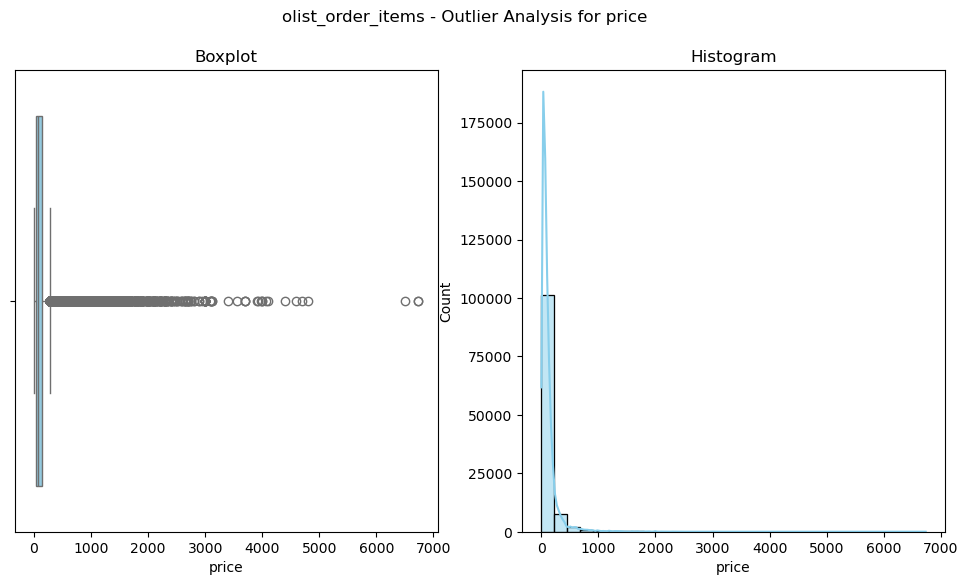

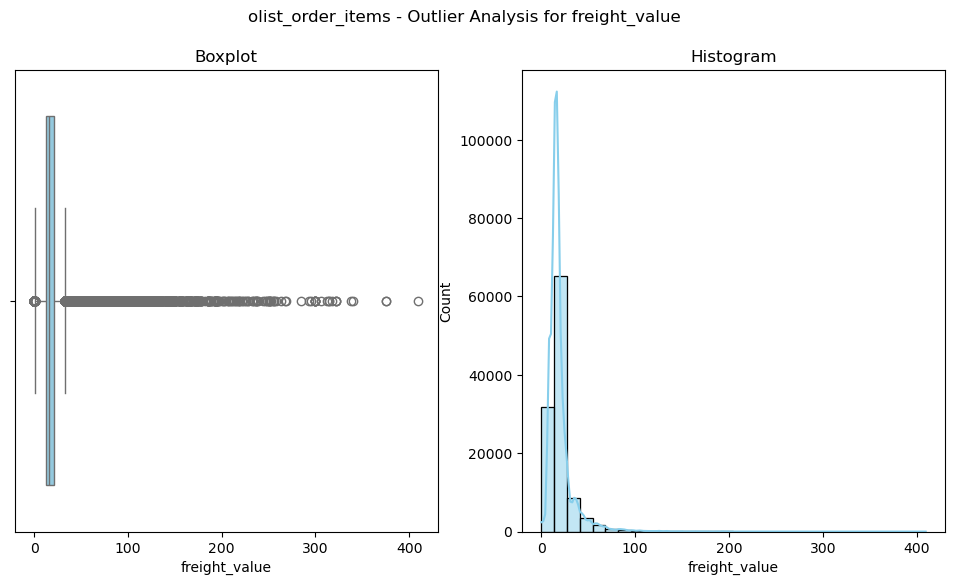

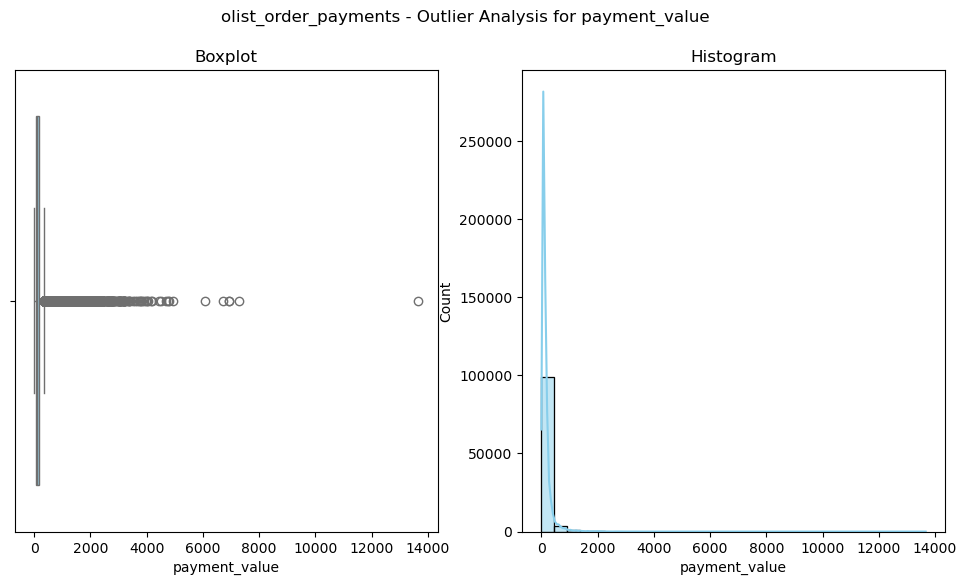

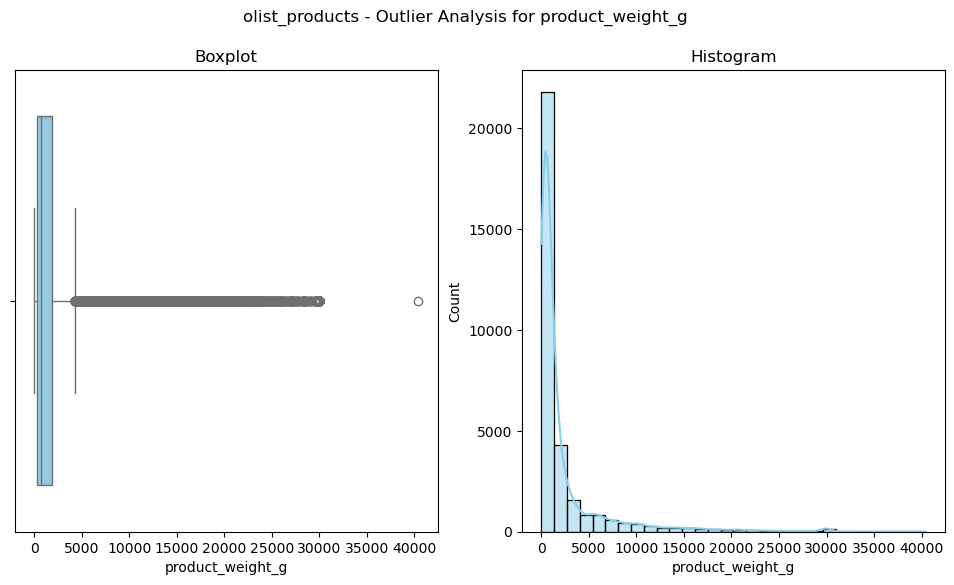

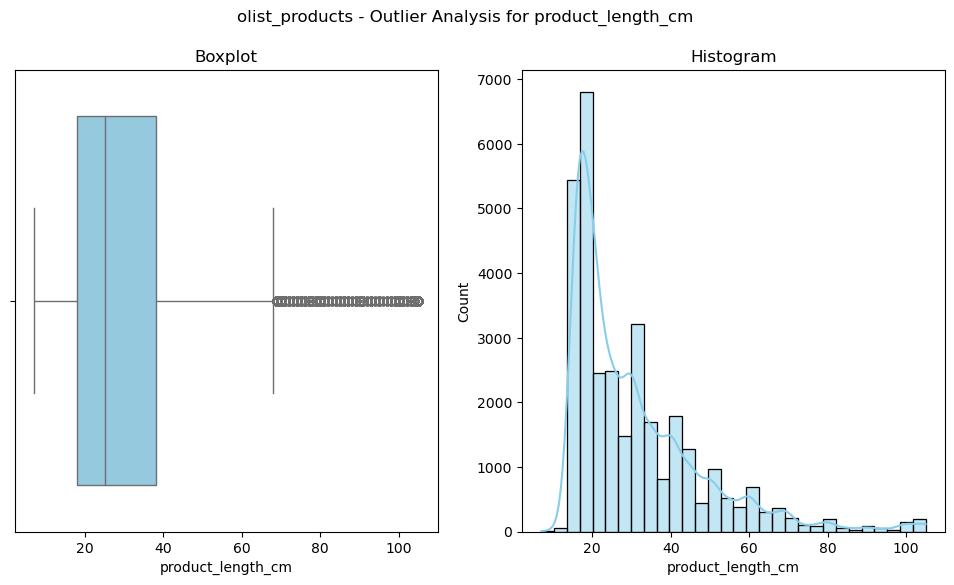

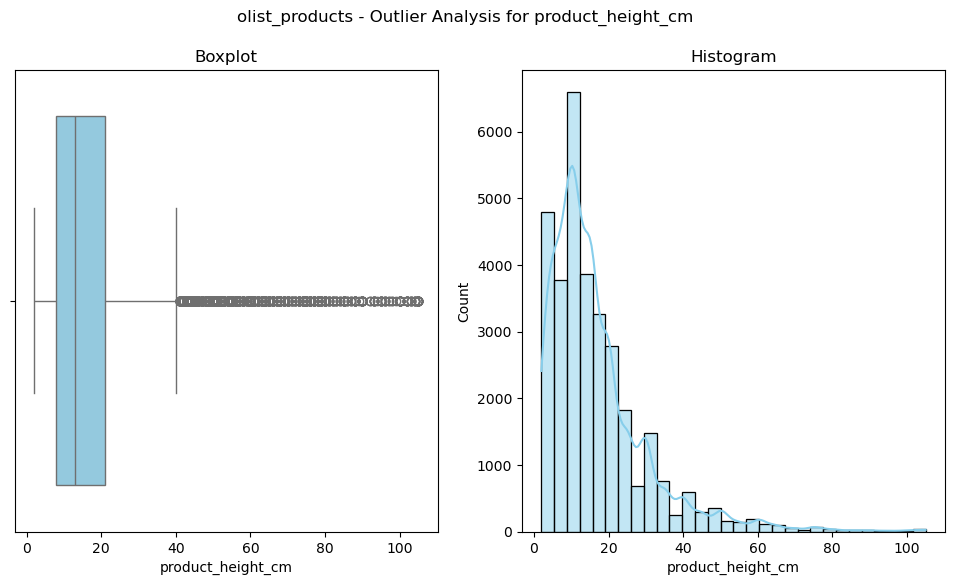

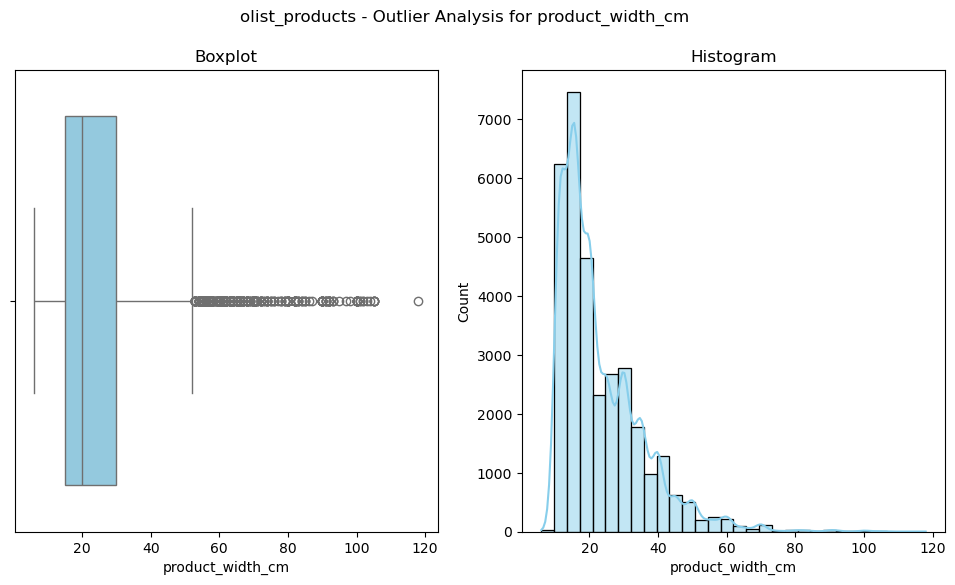

In [10]:
# Columns for outlier analysis
order_items_columns = ["price", "freight_value"]
products_columns = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
order_payments_columns = ["payment_value"]

# Function to plot outliers using boxplots and histograms
def plot_outliers(data, columns, title_prefix):
    for column in columns:
        if column not in data.columns:
            print(f"Column '{column}' not found in DataFrame.")
            continue
        
        # Create side-by-side boxplot and histogram for each column
        plt.figure(figsize=(12, 6))
        plt.suptitle(f"{title_prefix} - Outlier Analysis for {column}")
        
        # Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(data=data[column].dropna(), orient="h", color="skyblue")
        plt.title("Boxplot")
        
        # Histogram
        plt.subplot(1, 2, 2)
        sns.histplot(data[column].dropna(), bins=30, kde=True, color="skyblue")
        plt.title("Histogram")
        
        plt.show()


# Perform outlier analysis for relevant datasets
plot_outliers(deduplicated_datasets["olist_order_items"], order_items_columns, "olist_order_items")
plot_outliers(deduplicated_datasets["olist_order_payments"], order_payments_columns, "olist_order_payments")
plot_outliers(deduplicated_datasets["olist_products"], products_columns, "olist_products")

In [11]:
# Filter out rows where product_weight_g is 0 or 2
filtered_products = deduplicated_datasets["olist_products"][~deduplicated_datasets["olist_products"]["product_weight_g"].isin([0, 2])]

# Update the dataset with the filtered DataFrame
deduplicated_datasets["olist_products"] = filtered_products

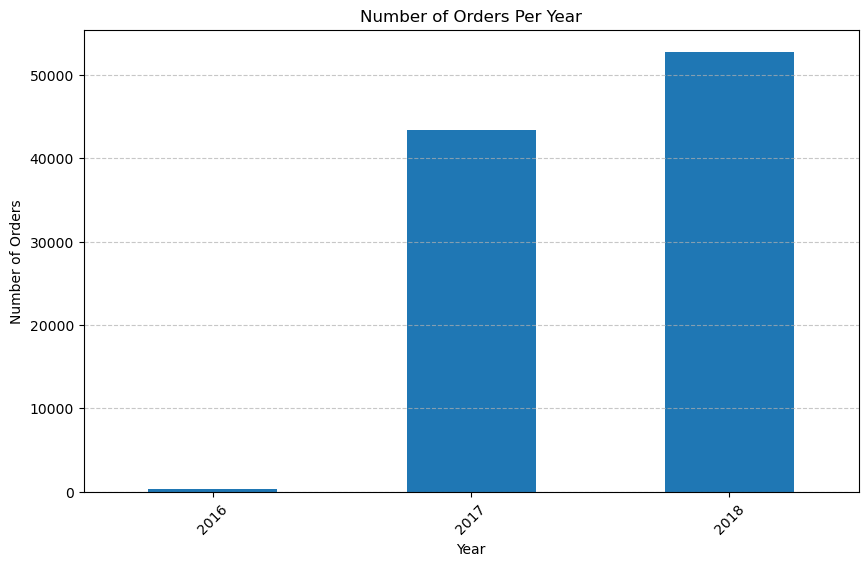

In [12]:
# Convert order_purchase column to datetime if not already
deduplicated_datasets["olist_orders"]["order_purchase_timestamp"] = pd.to_datetime(
    deduplicated_datasets["olist_orders"]["order_purchase_timestamp"]
)

# Extract the year from the order_purchase column
deduplicated_datasets["olist_orders"]["order_purchase_year"] = (
    deduplicated_datasets["olist_orders"]["order_purchase_timestamp"].dt.year
)

# Create a histogram to show the number of orders per year
plt.figure(figsize=(10, 6))
deduplicated_datasets["olist_orders"]["order_purchase_year"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Orders Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [13]:
# Remove rows with orders from 2016
filtered_orders = deduplicated_datasets["olist_orders"][
    deduplicated_datasets["olist_orders"]["order_purchase_year"] != 2016
]

# Update the dataset with the filtered DataFrame
deduplicated_datasets["olist_orders"] = filtered_orders

# Drop the order_purchase_year column as it's no longer needed
deduplicated_datasets["olist_orders"].drop(columns=["order_purchase_year"], inplace=True)

## 3. Data Validation

### 3. 1 City Name Standardization

To ensure consistency across datasets, we need to validate and standardize city names. Variations in case, whitespace, and accents can result in mismatches when performing joins or aggregations. The following transformations are applied:

1. **Trim Whitespaces**: Leading and trailing spaces are removed.
2. **Convert to Lowercase**: Ensures uniform casing for comparison.
3. **Remove Accents**: Converts accented characters (e.g., `São` → `Sao`) for uniformity.
4. **Handle Missing Values**: Retains `NaN` values without alteration.

In [14]:
# Function to standardize city names (trim, lowercase, remove accents)
def standardize_city(city_name):
    if pd.isnull(city_name):  # If the city name is NaN (missing value)
        return city_name  # Leave it as NaN
    city_name = city_name.strip().lower()  # Remove leading/trailing spaces and convert to lowercase
    city_name = unidecode.unidecode(city_name)  # Remove accents (e.g., São → Sao)
    return city_name

# Add datasets and city columns
city_columns = {
    "olist_sellers": "seller_city",
    "olist_geolocation": "geolocation_city",
    "olist_customers": "customer_city",
}

for dataset_name, city_column in city_columns.items():  # Loop through each dataset and its city column
    if city_column in deduplicated_datasets[dataset_name].columns:  # Check if the city column exists
        print(f"Standardizing city names in {dataset_name} ({city_column})...") # Prints a progress message
        deduplicated_datasets[dataset_name].loc[:, city_column] = deduplicated_datasets[dataset_name][city_column].apply(standardize_city) #applies the standardize_city function to each value in the column.

print("City name standardization completed.") # Prints a final completion message

Standardizing city names in olist_sellers (seller_city)...
Standardizing city names in olist_geolocation (geolocation_city)...
Standardizing city names in olist_customers (customer_city)...
City name standardization completed.


In [15]:
# Inspect unique city names in each dataset
for dataset_name, city_column in city_columns.items():
    if city_column in deduplicated_datasets[dataset_name].columns:
        unique_cities = deduplicated_datasets[dataset_name][city_column].unique()
        print(f"Unique cities in {dataset_name}: {len(unique_cities)}")
        print(unique_cities[:10])  # Show first 10 for a quick look

Unique cities in olist_sellers: 609
['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina']
Unique cities in olist_geolocation: 5968
['sao paulo' 'sao bernardo do campo' 'jundiai' 'taboao da serra'
 'saopaulo' 'sp' 'saPSo paulo' 'sao jose dos campos' 'osasco'
 'carapicuiba']
Unique cities in olist_customers: 4119
['franca' 'sao bernardo do campo' 'sao paulo' 'mogi das cruzes' 'campinas'
 'jaragua do sul' 'timoteo' 'curitiba' 'belo horizonte' 'montes claros']


### 3.2 State Abbreviations Validation

Check whether the state abbreviations in the datasets match the valid Brazilian state shortcuts

In [16]:
# Valid Brazilian state shortcuts
valid_states = [
    "AC", "AL", "AM", "AP", "BA", "CE", "DF", "ES", "GO", "MA", "MG", "MS",
    "MT", "PA", "PB", "PE", "PI", "PR", "RJ", "RN", "RO", "RR", "RS", "SC",
    "SE", "SP", "TO"
]

# Add datasets and state columns
state_columns = {
    "olist_sellers": "seller_state",
    "olist_geolocation": "geolocation_state",
    "olist_customers": "customer_state"
}

# Check state validity in each dataset
for dataset_name, state_column in state_columns.items():
    if state_column in deduplicated_datasets[dataset_name].columns:
        # Extract unique values in the state column
        unique_states = deduplicated_datasets[dataset_name][state_column].unique()
        
        # Find invalid state shortcuts
        invalid_states = [state for state in unique_states if state not in valid_states]
        
        # Print results
        if invalid_states:
            print(f"Dataset '{dataset_name}' has invalid state shortcuts: {invalid_states}")
        else:
            print(f"All state shortcuts in '{dataset_name}' are valid.")

All state shortcuts in 'olist_sellers' are valid.
All state shortcuts in 'olist_geolocation' are valid.
All state shortcuts in 'olist_customers' are valid.


### 3.3 State Name Mapping

#### Adding Full State Names

This step maps Brazilian state abbreviations (e.g., `SP`, `RJ`) to their full names (e.g., `São Paulo`, `Rio de Janeiro`) in relevant datasets for better readability and usability during analysis.

   - Datasets containing state columns are identified:
     - `olist_sellers` → `seller_state`
     - `olist_geolocation` → `geolocation_state`
     - `olist_customers` → `customer_state`

   - A new column (`state_full_name`) is added to each relevant dataset.

In [17]:
# Create the mapping dictionary
state_mapping = {
    "AC": "Acre",
    "AL": "Alagoas",
    "AM": "Amazonas",
    "AP": "Amapa",
    "BA": "Bahia",
    "CE": "Ceara",
    "DF": "Distrito Federal",
    "ES": "Espirito Santo",
    "GO": "Goias",
    "MA": "Maranhao",
    "MG": "Minas Gerais",
    "MS": "Mato Grosso do Sul",
    "MT": "Mato Grosso",
    "PA": "Para",
    "PB": "Paraiba",
    "PE": "Pernambuco",
    "PI": "Piaui",
    "PR": "Parana",
    "RJ": "Rio de Janeiro",
    "RN": "Rio Grande do Norte",
    "RO": "Rondonia",
    "RR": "Roraima",
    "RS": "Rio Grande do Sul",
    "SC": "Santa Catarina",
    "SE": "Sergipe",
    "SP": "Sao Paulo",
    "TO": "Tocantins"
}

# Identify datasets with state columns
state_columns = {
    "olist_sellers": "seller_state",
    "olist_geolocation": "geolocation_state",
    "olist_customers": "customer_state"
}

# Add a new column with full state names
for dataset_name, state_column in state_columns.items():
    if state_column in deduplicated_datasets[dataset_name].columns:
        print(f"Adding full state names to {dataset_name}...")
        # Explicitly use .loc to avoid SettingWithCopyWarning
        deduplicated_datasets[dataset_name].loc[:, "state_full_name"] = deduplicated_datasets[dataset_name][state_column].map(state_mapping)

print("Full state names added to relevant datasets.")

Adding full state names to olist_sellers...
Adding full state names to olist_geolocation...
Adding full state names to olist_customers...
Full state names added to relevant datasets.


C:\Users\Honza\AppData\Local\Temp\ipykernel_11708\3835689523.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deduplicated_datasets[dataset_name].loc[:, "state_full_name"] = deduplicated_datasets[dataset_name][state_column].map(state_mapping)


### 3.4 Geolocation

#### Filtering Geolocation Data

To ensure the geolocation dataset contains only valid coordinates within Brazil, we apply filters based on the country's extreme geographical boundaries:

- **Latitude Boundaries**: Between `-33.750936` (southernmost) and `5.269582` (northernmost).
- **Longitude Boundaries**: Between `-73.98306` (westernmost) and `-28.847684` (easternmost).


In [18]:
# Define Brazil's extreme boundaries
northernmost = 5.269582
southernmost = -33.750936
easternmost = -28.847684
westernmost = -73.98306

# Filter rows within the latitude and longitude bounds
geolocation_df = deduplicated_datasets["olist_geolocation"]

# Apply the filtering conditions
valid_geolocations = geolocation_df[
    (geolocation_df["geolocation_lat"] >= southernmost) &
    (geolocation_df["geolocation_lat"] <= northernmost) &
    (geolocation_df["geolocation_lng"] >= westernmost) &
    (geolocation_df["geolocation_lng"] <= easternmost)
]

# Update the dataset with valid rows only
deduplicated_datasets["olist_geolocation"] = valid_geolocations

# Print results
print(f"Rows outside Brazil removed. Remaining rows: {len(valid_geolocations)}")

Rows outside Brazil removed. Remaining rows: 738305


### 3.5 Category Translation

#### Translating Product Categories

This section focuses on translating all product categories in the `olist_products` dataset from Portuguese to English using the predefined `product_category_name_translation` dataset. 

Two categories originally lacked English equivalents and were manually translated:
- `pc_gamer` → `pc_gamer` (kept as is since it’s a common term)
- `portateis_cozinha_e_preparadores_de_alimentos` → `portable_kitchen_food_processors`

These manual translations were added to the translation dataset to ensure all product categories are properly translated. The final dataset replaces the original Portuguese categories with their English counterparts for consistency and ease of analysis.

In [19]:
# Load the translation dataset and product dataset
translation_df = deduplicated_datasets["product_category_name_translation"]
products_df = deduplicated_datasets["olist_products"]

# Create manual translations for missing categories
manual_translations = {
    'pc_gamer': 'pc_gamer',  # Keep as is since it's a common term
    'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_food_processors'  # Translated version
}

# Add these manual translations to the translation DataFrame
manual_df = pd.DataFrame({
    'product_category_name': manual_translations.keys(),
    'product_category_name_english': manual_translations.values()
})
translation_df = pd.concat([translation_df, manual_df], ignore_index=True)

# Now proceed with the merge and translation as before
products_df = products_df.merge(
    translation_df,
    how="left",
    on="product_category_name"
)

# Check if we still have any missing translations
missing_translations = products_df[products_df['product_category_name_english'].isna()]
if len(missing_translations) > 0:
    print(f"\nWarning: {len(missing_translations)} products still have missing translations")
    print("Categories without translations:")
    print(missing_translations['product_category_name'].unique())
else:
    print("All categories have been translated!")

# Replace Portuguese categories with English
products_df["product_category_name"] = products_df["product_category_name_english"]

# Drop the redundant translation column
products_df.drop(columns=["product_category_name_english"], inplace=True)

# Save the updated dataset back into the dictionary
deduplicated_datasets["olist_products"] = products_df

# Print final statistics
print("\nFinal translation statistics:")
print(f"Number of unique categories: {products_df['product_category_name'].nunique()}")
print("\nSample of translated categories:")
print(products_df['product_category_name'].value_counts().head())

All categories have been translated!

Final translation statistics:
Number of unique categories: 73

Sample of translated categories:
product_category_name
bed_bath_table     3025
sports_leisure     2867
furniture_decor    2653
health_beauty      2444
housewares         2335
Name: count, dtype: int64


### 3.6 Removing Invalid Values

#### Cleaning City Names
An enhanced function was implemented to clean city names across relevant datasets (`olist_sellers`, `olist_geolocation`, `olist_customers`). Key cleaning rules:
- Remove rows where city names contain invalid characters (e.g., `@` or numeric values).
- Remove unwanted substrings:
  - Text after the last `.`.
  - Content inside parentheses `()`.
  - Characters like `*`, `,`, `/`, and `-`.

In [20]:
# Adjusted function to clean city names with additional rules
def clean_city_name(city):
    city = str(city)
    # If '@' is in the city name, mark it for deletion by returning None
    if "@" in city:
        return None
    # Remove everything after the last '.' if it exists
    if "." in city:
        city = city.split(".")[-1]
    # Remove everything inside and including parentheses ()
    city = re.sub(r'\(.*?\)', '', city)
    # Remove '*' characters
    city = city.replace("*", "")
    # Remove special characters like ',', '/', '-' and anything following them
    city = re.split(r'[,/\\-]', city)[0].strip()
    # If the cleaned city is numeric, return None to remove the row
    if city.isnumeric():
        return None
    return city

# Apply the updated cleaning function to relevant columns
for dataset_name, city_column in city_columns.items():
    if city_column in deduplicated_datasets[dataset_name].columns:
        print(f"Cleaning city names in '{dataset_name}'...")
        # Access the DataFrame
        df = deduplicated_datasets[dataset_name]
        # Apply the cleaning function
        df.loc[:, city_column] = df[city_column].apply(clean_city_name)
        # Explicitly reassign the result of dropna to avoid the warning
        df = df.dropna(subset=[city_column])
        # Update the dictionary with the cleaned DataFrame
        deduplicated_datasets[dataset_name] = df

print("City name cleaning with adjustments completed.")

Cleaning city names in 'olist_sellers'...
Cleaning city names in 'olist_geolocation'...
Cleaning city names in 'olist_customers'...
City name cleaning with adjustments completed.


#### Handling Invalid Payment Installments
Rows in `olist_order_payments` where `payment_installments` is 0 were removed to ensure data consistency.

In [21]:
# Access the dataset with the payment_installments column
payments_df = deduplicated_datasets["olist_order_payments"]

# Filter out rows where payment_installments is 0
payments_cleaned = payments_df[payments_df["payment_installments"] != 0]

# Update the dataset in the deduplicated_datasets dictionary
deduplicated_datasets["olist_order_payments"] = payments_cleaned

# Output the number of rows removed
rows_removed = len(payments_df) - len(payments_cleaned)
print(f"Rows with 'payment_installments' = 0 removed: {rows_removed}")

Rows with 'payment_installments' = 0 removed: 2


#### Validating and Cleaning Dates
Logical coherence checks were performed on date columns to identify and remove invalid rows:
- `olist_orders`: Ensured chronological order between `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date`.
- `olist_order_reviews`: Ensured `review_creation_date` occurred before `review_answer_timestamp`.

#### Results
- Updated datasets with cleaned city names, valid payment installments, and consistent date records.
- Previews of cleaned datasets (`olist_orders`, `olist_order_reviews`) were generated for verification.

These steps ensure data accuracy and integrity across all relevant datasets.

In [22]:
# Function to validate and clean date columns
def validate_and_clean_dates():
    # Access the relevant datasets
    orders_df = deduplicated_datasets["olist_orders"]
    reviews_df = deduplicated_datasets["olist_order_reviews"]
    
    # Logical coherence for 'olist_orders' (excluding estimated delivery validation)
    orders_invalid = (
        (orders_df["order_purchase_timestamp"] > orders_df["order_approved_at"]) |
        (orders_df["order_approved_at"] > orders_df["order_delivered_carrier_date"]) |
        (orders_df["order_delivered_carrier_date"] > orders_df["order_delivered_customer_date"])
    )
    
    # Count invalid rows in 'olist_orders'
    invalid_orders_count = orders_invalid.sum()
    print(f"Invalid rows in 'olist_orders': {invalid_orders_count}")
    
    # Remove invalid rows
    deduplicated_datasets["olist_orders"] = orders_df[~orders_invalid]
    
    # Logical coherence for 'olist_order_reviews'
    reviews_invalid = (
        reviews_df["review_creation_date"] > reviews_df["review_answer_timestamp"]
    )
    
    # Count invalid rows in 'olist_order_reviews'
    invalid_reviews_count = reviews_invalid.sum()
    print(f"Invalid rows in 'olist_order_reviews': {invalid_reviews_count}")
    
    # Remove invalid rows
    deduplicated_datasets["olist_order_reviews"] = reviews_df[~reviews_invalid]

# Call the function to clean the datasets
validate_and_clean_dates()

# Display previews of the cleaned datasets for verification
print("Preview of cleaned olist_orders:")
print(deduplicated_datasets["olist_orders"].head())

print("\nPreview of cleaned olist_order_reviews:")
print(deduplicated_datasets["olist_order_reviews"].head())

Invalid rows in 'olist_orders': 1369
Invalid rows in 'olist_order_reviews': 0
Preview of cleaned olist_orders:
                           order_id                       customer_id order_status order_purchase_timestamp   order_approved_at order_delivered_carrier_date  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15          2017-10-04 19:55:00   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27          2018-07-26 14:31:00   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23          2018-08-08 13:50:00   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59          2017-11-22 13:39:59   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2

### 4. New Columns

#### Enhancing Datasets with New Features

Several new columns were added to enhance the analysis of orders and order items:

1. **`olist_orders` Dataset**:
   - `delivery_duration_hours`: Calculates the delivery duration in hours from `order_purchase_timestamp` to `order_delivered_customer_date`.
   - `late_delivery`: Flags whether the delivery was late by comparing `order_delivered_customer_date` with `order_estimated_delivery_date`.
   - `approval_duration_minutes`: Calculates the time taken for order approval in minutes from `order_purchase_timestamp` to `order_approved_at`.
   - `estimated_delivery_duration_hours`: Calculates the estimated delivery duration in hours from `order_purchase_timestamp` to `order_estimated_delivery_date`.
   - `approval_to_carrier_hours`: Calculates the time taken from order approval to delivery to carrier in hours from `order_approved_at` to `order_delivered_carrier_date`.
   - `carrier_to_customer_hours`: Calculates the time taken delivery to carrier to delivery to customer in hours from `order_delivered_carrier_date` to `order_delivered_customer_date`.


These new columns provide insights into delivery performance, order approval times, and financial details, supporting more detailed analyses.


In [23]:
# Access the datasets
orders_df = deduplicated_datasets["olist_orders"]

# Calculate delivery duration in hours
orders_df["delivery_duration_hours"] = (
    orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
).dt.total_seconds() / 3600  # Convert seconds to hours
print("Added 'delivery_duration_hours' column to 'olist_orders'.")

# Add Delivery Speed Flags (on time or late)
orders_df["late_delivery"] = orders_df["order_delivered_customer_date"] > orders_df["order_estimated_delivery_date"]
print("Added 'late_delivery' column to 'olist_orders'.")

# Calculate approval duration in minutes
orders_df["approval_duration_minutes"] = (
    orders_df["order_approved_at"] - orders_df["order_purchase_timestamp"]
).dt.total_seconds() / 60  # Convert seconds to minutes
print("Added 'approval_duration_minutes' column to 'olist_orders'.")

# Calculate estimated delivery duration in hours
orders_df["estimated_delivery_duration_hours"] = (
    orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
).dt.total_seconds() / 3600
print("Added 'expected_delivery_duration_hours' column to 'olist_orders'.")

# Calculate time from approval to carrier delivery in hours
orders_df["approval_to_carrier_hours"] = (
    orders_df["order_delivered_carrier_date"] - orders_df["order_approved_at"]
).dt.total_seconds() / 3600
print("Added 'approval_to_carrier_hours' column to 'olist_orders'.")

# Calculate time from carrier to customer delivery in hours
orders_df["carrier_to_customer_hours"] = (
    orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
).dt.total_seconds() / 3600
print("Added 'carrier_to_customer_hours' column to 'olist_orders'.")

# Update the dictionary with the modified orders dataset
deduplicated_datasets["olist_orders"] = orders_df

Added 'delivery_duration_hours' column to 'olist_orders'.
Added 'late_delivery' column to 'olist_orders'.
Added 'approval_duration_minutes' column to 'olist_orders'.
Added 'expected_delivery_duration_hours' column to 'olist_orders'.
Added 'approval_to_carrier_hours' column to 'olist_orders'.
Added 'carrier_to_customer_hours' column to 'olist_orders'.


C:\Users\Honza\AppData\Local\Temp\ipykernel_11708\2741568446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df["delivery_duration_hours"] = (
C:\Users\Honza\AppData\Local\Temp\ipykernel_11708\2741568446.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df["late_delivery"] = orders_df["order_delivered_customer_date"] > orders_df["order_estimated_delivery_date"]
C:\Users\Honza\AppData\Local\Temp\ipykernel_11708\2741568446.py:15: SettingWithCopyWarning: 
A value is trying to be set on a c

### 5. Handling Missing Keys

#### Key Integrity Checks
Performed integrity checks to ensure foreign key relationships between datasets and eliminate missing or invalid references:
- **Order ID (`order_id`)**:
  - Verified presence across dependent datasets (`olist_order_items`, `olist_order_payments`, `olist_order_reviews`) against `olist_orders`.
- **Customer ID (`customer_id`)**:
  - Ensured all `customer_id` values in `olist_orders` exist in `olist_customers`.
- **Product ID (`product_id`)**:
  - Verified `product_id` in `olist_order_items` exists in `olist_products`.
- **Seller ID (`seller_id`)**:
  - Checked `seller_id` in `olist_order_items` against `olist_sellers`.
- **ZIP Code Prefix (`zip_code_prefix`)**:
  - Validated `zip_code_prefix` in `olist_customers` and `olist_sellers` against `olist_geolocation`.

#### Data Cleaning Actions
- Removed rows with:
  - Missing `order_id` across dependent datasets.
  - Missing `product_id` in `olist_order_items`.
  - Invalid `zip_code_prefix` references in `olist_customers` and `olist_sellers`.

#### Results
- Key counts of missing values were logged.
- Cleaned datasets were updated to remove inconsistencies while maintaining relational integrity.

In [24]:
# Key integrity checks

# Dictionary to store results of integrity checks
integrity_results = {}

# Check foreign keys for 'order_id' in dependent datasets
datasets_with_order_id = ["olist_order_items", "olist_order_payments", "olist_order_reviews"]
orders_df = deduplicated_datasets["olist_orders"]

for dataset in datasets_with_order_id:
    # Load the dependent dataset
    dependent_df = deduplicated_datasets[dataset]
    # Identify rows with 'order_id' not present in 'olist_orders'
    missing_keys = dependent_df[~dependent_df["order_id"].isin(orders_df["order_id"])]
    # Store the count of missing keys
    integrity_results[f"{dataset}_missing_order_id"] = len(missing_keys)
    print(f"Missing 'order_id' in 'olist_orders' from '{dataset}': {len(missing_keys)}")

# Check foreign keys for 'customer_id' in 'olist_orders'
customers_df = deduplicated_datasets["olist_customers"] 
# Identify rows in 'olist_orders' where 'customer_id' is missing in 'olist_customers'
missing_customer_ids = orders_df[~orders_df["customer_id"].isin(customers_df["customer_id"])]
# Store the count of missing 'customer_id'
integrity_results["missing_customer_ids"] = len(missing_customer_ids)
print(f"Missing 'customer_id' in 'olist_customers' from 'olist_orders': {len(missing_customer_ids)}")


# Check foreign keys for 'product_id' in 'olist_order_items'
items_df = deduplicated_datasets["olist_order_items"]
products_df = deduplicated_datasets["olist_products"]
# Identify rows in 'olist_order_items' where 'product_id' is missing in 'olist_products'
missing_product_ids = items_df[~items_df["product_id"].isin(products_df["product_id"])]
# Store the count of missing 'product_id'
integrity_results["missing_product_ids"] = len(missing_product_ids)
print(f"Missing 'product_id' in 'olist_products' from 'olist_order_items': {len(missing_product_ids)}")

# Check foreign keys for 'seller_id' in 'olist_order_items'
sellers_df = deduplicated_datasets["olist_sellers"]
# Identify rows in 'olist_order_items' where 'seller_id' is missing in 'olist_sellers'
missing_seller_ids = items_df[~items_df["seller_id"].isin(sellers_df["seller_id"])]
# Store the count of missing 'seller_id'
integrity_results["missing_seller_ids"] = len(missing_seller_ids)
print(f"Missing 'seller_id' in 'olist_sellers' from 'olist_order_items': {len(missing_seller_ids)}")

# Check foreign keys for zip_code_prefix in olist_customers and olist_sellers
geolocation_df = deduplicated_datasets["olist_geolocation"]

# Check for missing 'zip_code_prefix' in 'olist_customers'
if "zip_code_prefix" in customers_df.columns:
    # Identify rows in 'olist_customers' where 'zip_code_prefix' is missing in 'olist_geolocation'
    missing_zip_customer = customers_df[
        ~customers_df["zip_code_prefix"].isin(geolocation_df.get("geolocation_zip_code_prefix", []))
    ]
    print(f"Missing 'zip_code_prefix' in 'olist_geolocation' from 'olist_customers': {len(missing_zip_customer)}")
else:
    print("The 'zip_code_prefix' column is missing in 'olist_customers'.")

# Check for missing 'seller_zip_code_prefix' in 'olist_sellers'
if "seller_zip_code_prefix" in sellers_df.columns:
    # Identify rows in 'olist_sellers' where 'seller_zip_code_prefix' is missing in 'olist_geolocation'
    missing_zip_seller = sellers_df[
        ~sellers_df["seller_zip_code_prefix"].isin(geolocation_df.get("geolocation_zip_code_prefix", []))
    ]
    print(f"Missing 'seller_zip_code_prefix' in 'olist_geolocation' from 'olist_sellers': {len(missing_zip_seller)}")
else:
    print("The 'seller_zip_code_prefix' column is missing in 'olist_sellers'.")

Missing 'order_id' in 'olist_orders' from 'olist_order_items': 4380
Missing 'order_id' in 'olist_orders' from 'olist_order_payments': 4854
Missing 'order_id' in 'olist_orders' from 'olist_order_reviews': 4515
Missing 'customer_id' in 'olist_customers' from 'olist_orders': 0
Missing 'product_id' in 'olist_products' from 'olist_order_items': 1617
Missing 'seller_id' in 'olist_sellers' from 'olist_order_items': 39
The 'zip_code_prefix' column is missing in 'olist_customers'.
Missing 'seller_zip_code_prefix' in 'olist_geolocation' from 'olist_sellers': 7


In [25]:
# Access datasets from deduplicated_datasets
order_items_df = deduplicated_datasets["olist_order_items"]
order_payments_df = deduplicated_datasets["olist_order_payments"]
order_reviews_df = deduplicated_datasets["olist_order_reviews"]
orders_df = deduplicated_datasets["olist_orders"]

# Remove rows with missing order_ids
order_items_cleaned = order_items_df[order_items_df["order_id"].isin(orders_df["order_id"])]
order_payments_cleaned = order_payments_df[order_payments_df["order_id"].isin(orders_df["order_id"])]
order_reviews_cleaned = order_reviews_df[order_reviews_df["order_id"].isin(orders_df["order_id"])]

# Update datasets in the dictionary
deduplicated_datasets["olist_order_items"] = order_items_cleaned
deduplicated_datasets["olist_order_payments"] = order_payments_cleaned
deduplicated_datasets["olist_order_reviews"] = order_reviews_cleaned

# Log the number of rows removed due to missing 'order_id'
print(f"Removed missing 'order_id' rows: "
      f"olist_order_items: {len(order_items_df) - len(order_items_cleaned)}, "
      f"olist_order_payments: {len(order_payments_df) - len(order_payments_cleaned)}, "
      f"olist_order_reviews: {len(order_reviews_df) - len(order_reviews_cleaned)}")

Removed missing 'order_id' rows: olist_order_items: 4380, olist_order_payments: 4854, olist_order_reviews: 4515


In [26]:
# Access the 'olist_products' dataset
products_df = deduplicated_datasets["olist_products"]

# Remove rows with missing product_ids
order_items_cleaned = order_items_cleaned[order_items_cleaned["product_id"].isin(products_df["product_id"])]

# Update the cleaned dataset back into the dictionary
deduplicated_datasets["olist_order_items"] = order_items_cleaned

# Log the number of rows removed due to missing 'product_id'
print(f"Removed missing 'product_id' rows from 'olist_order_items': {len(order_items_df) - len(order_items_cleaned)}")

Removed missing 'product_id' rows from 'olist_order_items': 5918


In [27]:
# Display updated dataset information
display_dataset_info(deduplicated_datasets)


Summary for Dataset: olist_sellers

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3093 entries, 0 to 3094
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3093 non-null   object
 1   seller_zip_code_prefix  3093 non-null   int64 
 2   seller_city             3093 non-null   object
 3   seller_state            3093 non-null   object
 4   state_full_name         3093 non-null   object
dtypes: int64(1), object(4)
memory usage: 145.0+ KB
None

Describe:
                               seller_id  seller_zip_code_prefix seller_city seller_state state_full_name
count                               3093             3093.000000        3093         3093            3093
unique                              3093                     NaN         588           23              23
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo           SP       Sao Paulo


## 5. Exporting Cleaned Datasets

In [28]:
# Export each dataset in the dictionary as a CSV file to the already existing folder
for name, df in deduplicated_datasets.items():
    df.to_csv(f"../dataset_cleaned/{name}_cleaned.csv", index=False) # Ensure no index column is added
    print(f"Exported: ../dataset_cleaned/{name}_cleaned.csv") # Log the export operation

# Confirmation message
print("All cleaned datasets have been exported.")

Exported: ../dataset_cleaned/olist_sellers_cleaned.csv
Exported: ../dataset_cleaned/olist_products_cleaned.csv
Exported: ../dataset_cleaned/olist_order_reviews_cleaned.csv
Exported: ../dataset_cleaned/olist_orders_cleaned.csv
Exported: ../dataset_cleaned/olist_order_payments_cleaned.csv
Exported: ../dataset_cleaned/olist_order_items_cleaned.csv
Exported: ../dataset_cleaned/olist_geolocation_cleaned.csv
Exported: ../dataset_cleaned/olist_customers_cleaned.csv
Exported: ../dataset_cleaned/product_category_name_translation_cleaned.csv
All cleaned datasets have been exported.
